### 서울시 구별 인구현황및 CCTV 현황 분석

- 적절한 설치 비율을 통계를 통해 시각화
- 평균이동선을 구현
- pandas 사용(기본 사용법)
- matplotlib 사용(기본 차트 사용법)

### 데이터 수집
http://115.84.165.39/dataList/OA-2734/C/1/datasetView.do;jsessionid=73482CE9765B83019ADC9D8C6C9C3F0A.new_portal-svr-11
http://data.seoul.go.kr/dataList/419/S/2/datasetView.do    

In [2]:
import pandas as pd

In [3]:
# 데이터로드
# 윈도우 경우 파일명이 한글이면 읽지는 못하는 경우가 있다
# 혹은 문서 인코딩이 틀려서 못읽는 경우도 있다
s_cctv = pd.read_csv('./data/seoul_cctv.csv', encoding='utf-8')

In [4]:
# 데이터가 로드 되었으면 시작값과 끝값을 확인
# 최초 5개의 데이터가 로드
s_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
# 마지막에서 5개 데이터 로드
s_cctv.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [6]:
# 컬럼 확인
s_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
# 컬럼명 : '2013년도 이전' 획득
s_cctv.columns[2]

'2013년도 이전'

In [8]:
# 인덱스 
s_cctv.index

RangeIndex(start=0, stop=25, step=1)

In [9]:
# 특정인덱스 
s_cctv.index[1]

1

In [10]:
# 컬럼명 변경 : "기관명" => "자치구" 변경 
dic = {  s_cctv.columns[0]:'자치구'  }
# inplace=True => 원본에 적용해라
s_cctv.rename( columns=dic, inplace=True  )

In [11]:
# 보고싶은 개수를 인자로 넣어서 확인 가능
# 컬럼명이 변경된 것을 확인
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [12]:
# 인구 현황 로드하기 s_pop
s_pop = pd.read_excel('./data/Report.xls', encoding='utf-8')

In [13]:
s_pop.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.2/4,합계,4241547,10089517,4935944,5153573,9814049,4802769,5011280,275468,133175,142293,2.31,1393671
3,2018.2/4,종로구,73655,163569,79522,84047,153780,75247,78533,9789,4275,5514,2.09,26512
4,2018.2/4,중구,61091,135427,66673,68754,126032,62260,63772,9395,4413,4982,2.06,21798


- 컬럼쪽이 원데이터에서 셀 병합이 되어 있어서 불필요하게 2개가 더 들어갔다
> 제거 필요
- 데이터중에 필요하지 않는 부분(남여구분,기간등은 필요없다)
- 총인구, 한국인총수, 외국인총수, 64세이상총수, 자치구만 로드

In [14]:
# header : 몇번째 행부터 읽을 것인가
# usecols : 로드할 엑셀의 컬러명 열거
s_pop = pd.read_excel('./data/Report.xls', encoding='utf-8', header=2, 
                      usecols='B, D, G, J, N'  )

In [15]:
s_pop.head()
# 계->인구수, 계.1->한국인, 계.2->외국인, 65세이상고령자->고령자 컬럼명변경

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [16]:
dic = { s_pop.columns[1]:'인구수',  
        s_pop.columns[2]:'한국인',  
        s_pop.columns[3]:'외국인',  
        s_pop.columns[4]:'고령자'
      }
s_pop.rename( columns=dic, inplace=True )
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


### pandas 기초 학습 하기

In [17]:
# 데이터 확인
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [18]:
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


In [19]:
# s_cctv 데이터에서 '소계' 컬럼을 기준으로 오름 차순 정렬, 최초 3개만 확인
s_cctv.sort_values(by='소계', ascending=True).head(3)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174


In [20]:
# s_cctv 데이터에서 '소계' 컬럼을 기준으로 내림 차순 정렬, 최초 3개만 확인
s_cctv.sort_values(by='소계', ascending=False).head(3)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398


- cctv 집계수를 보고 여러 가설들이 발생될수 있다
- 해당 자치구의 주거지역/상업지역/지하철(교통요인) 부분도 고려되면 좋겟다는 예상
- 주거지역은 cctv가 낮고, 상업지역은 높아 보인다
- 2013년도 이전 데이터 대비 3년간 증가된 cctv수에 대한 증가율을 살펴볼 필요가있다
- 최근 3년간 증가율 = (2014+2015+2016)/2013 * 100
- 최근 증가율이라는 컬럼명으로 추가하시오

In [23]:
# 데이터 프레임의 컬럼
# 데이터의 순서가 동일하고 향후 년도 데이터만 추가된다는 전제
s_cctv.columns[3:]

Index(['2014년', '2015년', '2016년'], dtype='object')

In [24]:
# 사본 결과, 해당 컬럼 데이터만 나온다
s_cctv[ s_cctv.columns[3:] ].head(2)

,2014년,2015년,2016년
0,430,584,932
1,99,155,377


In [25]:
# 누적합
s_cctv[ s_cctv.columns[3:] ].cumsum(axis=1).head(2)

,2014년,2015년,2016년
0,430,1014,1946
1,99,254,631


In [26]:
# 2016년도 데이터만(누적합의 데이터가 모인곳)
s_cctv[ s_cctv.columns[3:] ].cumsum(axis=1)[s_cctv.columns[-1:]].head(2)

,2016년
0,1946
1,631


In [33]:
csum = s_cctv[ ['2014년','2015년','2016년'] ].cumsum(axis=1)
csum['2016년'].head(2)

0    1946
1     631
Name: 2016년, dtype: int64

In [34]:
# 위의 데이터를 series로 구성 -> 차원 축소 -> 슬라이싱->인덱싱
tmp = s_cctv[ s_cctv.columns[3:] ].cumsum(axis=1)[s_cctv.columns[-1]]

In [35]:
s_cctv['최근 증가율']  = tmp / s_cctv[ s_cctv.columns[2] ]*100
# s_cctv['최근 증가율']  = tmp / s_cctv[ '2013년도 이전' ]*100
s_cctv['최근 증가율2'] = (s_cctv['2014년']+s_cctv['2015년']+ \
                         s_cctv['2016년'])/s_cctv['2013년도 이전']*100

In [37]:
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,최근 증가율2
0,강남구,3238,1292,430,584,932,150.619195,150.619195
1,강동구,1010,379,99,155,377,166.490765,166.490765


In [38]:
# 더미 데이터 제거
try:
    del s_cctv['최근 증가율2']
except Exception as e:
    print( e )
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765


### 인구 현황 분석

In [39]:
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


In [40]:
# 0번 행 제거
s_pop.drop( [0], inplace=True )
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798


In [41]:
# 데이터 프레임의 고유값, 키로 검토중인 => 자치구
# 고유함 검사
s_pop['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [42]:
len(s_pop['자치구'].unique())

25

In [43]:
len(s_pop.index)
# 행이 개수와 자치구 컬럼데이터의 중복제거후 개수가 동일하므로 고유하다

25

In [44]:
# NaN 있을 경우 제거해야한다  혹은 보간 (주식)
# NaN 데이터 추출
# 하나라도 참이 있는가 있다면 Nan이 존재하는것임
# 체크방법 1
s_pop['자치구'].isnull().any()

False

In [45]:
# 체크 방법 2
s_pop[ s_pop['자치구'].isnull() ].index

Int64Index([], dtype='int64')

In [46]:
# Nan이 존재하면 해당 행을 모두 제거해라
if s_pop['자치구'].isnull().any():
    index = s_pop[ s_pop['자치구'].isnull() ].index
    s_pop.drop( [ index ], inplace=True )
    print('nan 제거됨')

s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798


In [47]:
# 전체 인구 대비 외국인 비율, 고령자 비율 계산 추가
# 고령자 비율 = 고령자/인구수 * 100
s_pop['외국인비율'] = s_pop['외국인']/s_pop['인구수'] *100
s_pop['고령자비율'] = s_pop['고령자']/s_pop['인구수'] *100
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163569,153780,9789,26512,5.984630,16.208450
2,중구,135427,126032,9395,21798,6.937317,16.095756


In [48]:
# 외국인 비율 기준 내림차순 정렬해서 샘플로 2개 출력
s_pop.sort_values(by='외국인비율', ascending=False).head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404501,369003,35498,54994,8.775751,13.595516
18,금천구,252752,233263,19489,34945,7.710720,13.825806


In [49]:
s_pop.sort_values(by='고령자비율', ascending=True).head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673161,666439,6722,79093,0.998572,11.749492
23,강남구,551888,546952,4936,66011,0.894384,11.960941


### 데이터 병합
- 인구대비 CCTV 주제를 분석하기 위해서 
- 개별 데이터프레임을 하나로 합쳐야 한다

In [51]:
# 교집합
data_result = pd.merge( s_cctv, s_pop, on='자치구' )
data_result.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,379,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575


In [52]:
# 2013년도 이전	2014년	2015년	2016년 제거
try:
    del data_result['2013년도 이전']
    del data_result['2014년']
    del data_result['2015년']
    del data_result['2016년']
except Exception as e:
    print(e)

In [53]:
data_result.head(2)

,자치구,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575


In [54]:
# 인덱스가 단순히 0~ 시작하는 의미없는 숫자이다 
# 2차원 시각화 할때 (x좌표(좌우), y좌표(상하)) 
# 키로 사용한 그리고, 고유한 값을 가진 컬럼 => 자치구 -> 인덱스로 변경하겠다
# 특정 컬럼의 인덱스화
data_result.set_index( '자치구', inplace=True )
data_result.head(2)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575


In [55]:
import numpy as np
# CCTV 소계 대비 인구수, 고령자비율, 외국인비율 어던 상관이 있느지 체크
# 상관계수 : 0.1 이하 : 무시
# ~0.3 이하 : 약한 상관 관계
# ~-0.7 이하 : 뚜렷한 상관 관계
# np.corrcoef(): 상관 계수 계산 함수
np.corrcoef( data_result['인구수'], data_result['소계'] )
# 대각선을 기준으로 대칭인 행렬
# 대각선을 제외하고 값을 확인하면 된다 
# 0.22536935 => 약한 상관 관계

array([[1.        , 0.22536935],
       [0.22536935, 1.        ]])

In [56]:
np.corrcoef( data_result['외국인비율'], data_result['소계'] )

array([[ 1.        , -0.04749504],
       [-0.04749504,  1.        ]])

In [57]:
np.corrcoef( data_result['고령자비율'], data_result['소계'] )

array([[ 1.        , -0.26836087],
       [-0.26836087,  1.        ]])

In [ ]:
# 외국인비율과 고령자 비율은 CCTV설치 와 연관성이 없다

In [58]:
# CCTV 소계 중심 정렬
# CCTV 소계 대비 인구에 대한 결과치가 잘 않보인다 -> 시각화 
data_result.sort_values(by='소계', ascending=False).head(3)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
양천구,2482,34.671731,471026,467151,3875,56742,0.822672,12.046469
서초구,2297,63.371266,443989,439844,4145,54614,0.933582,12.300755


In [59]:
data_result.sort_values(by='인구수', ascending=False).head(3)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
송파구,1081,104.347826,673161,666439,6722,79093,0.998572,11.749492
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404
노원구,1566,188.929889,553177,549365,3812,75741,0.689110,13.692001


### 시각화 (플로팅)
- CCTV 현황과 인구 현황을 시각화 하여 
- 데이터 현황을 살펴 본다

In [75]:
import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

In [ ]:
platform.system()

# import matplotlib as mpl
# mpl.matplotlib_fname()
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list
[s for s in font_list if "Nanum" in s]

In [ ]:
plt.rc('font', family='NanumGothic')

In [ ]:
rc( 'font', family='NanumGothic' )

In [92]:
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    font_list_mac = fm.OSXInstalledFonts()
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Linux': # 리눅스
    rc( 'font', family='NanumGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    # fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family='NanumGothic' )
else:
    print('알수없는 시스템. 미적용')

In [88]:
data_result.head(2)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575


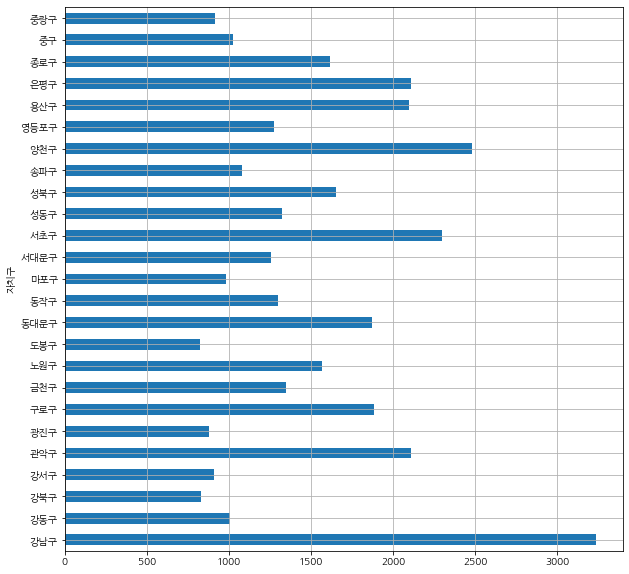

In [93]:
plt.figure()
plt.rc('font', family='NanumGothic')
# 차트 모양 ; barh : bar + h (수평선 차트 드로잉)
data_result['소계'].plot( kind='barh', grid=True, figsize=(10,10) )
plt.show()
# 소계가 많은 순부터 시각화 하시오

In [ ]:
data_result['소계'].sort_values()

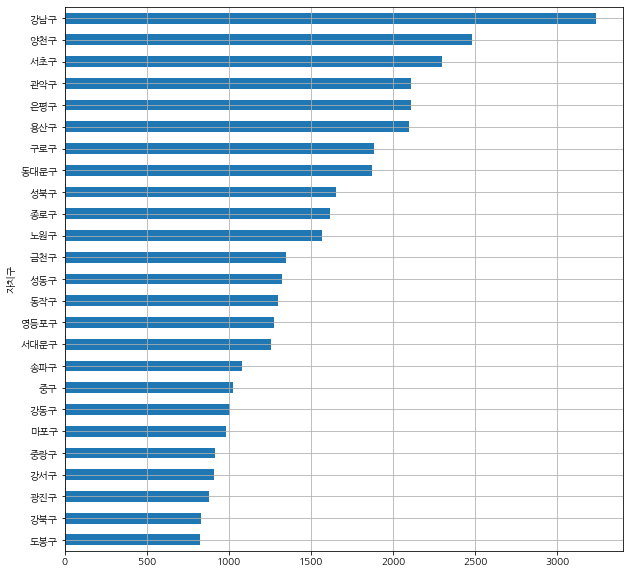

In [94]:
plt.figure()

# 전체 df를 소트하고 나서 특정 컬럼 시각화
#data_result.sort_values(by='소계', ascending=True)['소계'].plot( kind='barh', grid=True, figsize=(10,10) )

# 해당 컬러만 소트해서 시각화
data_result['소계'].sort_values().plot( kind='barh', grid=True, figsize=(10,10) )

plt.show()

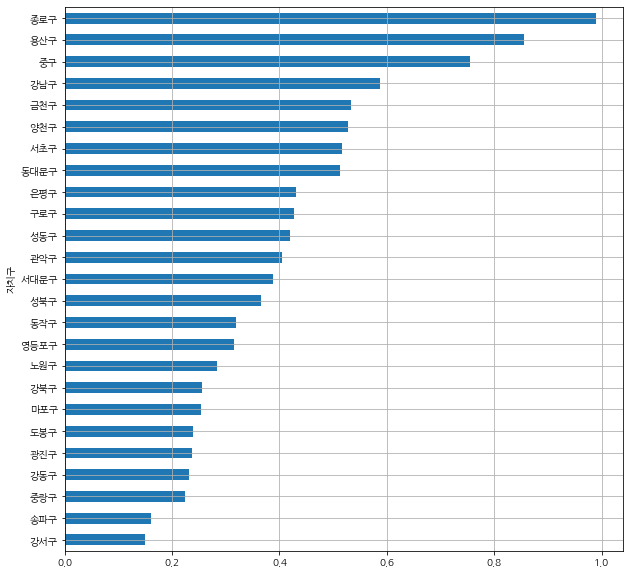

In [95]:
# 인구당 cctv 설치 비율
# CCTV비율 = 소계/인구수 * 100 
data_result['CCTV비율'] = data_result['소계']/data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()
# 종로구가 인구대비 가장 많이 CCTV를 설치한 지역
# 인구대비 설치 비율이 적절한지 판단 -> 적절한 설치 비율 찾아야 한다.

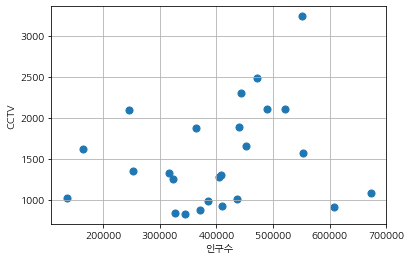

In [96]:
# x축 인구수, y축은 cctv수는 분포도 표현
plt.scatter( data_result['인구수'],data_result['소계'], s=50 )
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [97]:
# numpy에서 지원되는 함수를 이용하여 
# 인구수:입력 소계:출력 => 이것을 만족하는 함수(모델)을 생성
# 함수를 1차, 2차, 3차, ~ 15차, 1차만 수행
# 입력대비 출력을 만족하는 1차 함수 생성 
# 1차함수 y = ax + b => 기울기, 절편
fp1 = np.polyfit( data_result['인구수'], data_result['소계'], 1 )
fp1
# [ 기울기, 절편 ]

array([1.08389848e-03, 1.07787951e+03])

In [98]:
# 함수 생성
f1 = np.poly1d( fp1 )

In [99]:
# x 값은 100000~700000 사이 100씩 증가
x  = np.linspace( 100000, 700000, 100 ) 

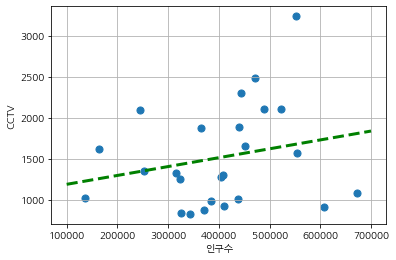

In [100]:
# 시각화
plt.scatter( data_result['인구수'],data_result['소계'], s=50 )
# 인구대비 CCTV의 관계를 1차함수로 표현한 선
plt.plot( x, f1(x), ls='dashed', lw=3, color='g' )
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

- 1차함수 직선은 전체의 대표값
- 40만명 기준 적적한 CCTV의 설치대수 1500대를 평균적으로 적절하다고 본다
- 데이터 변곡점에 어떤 자치구의 데이터인지 마킹
- 오차율을 계산해서 데이터포함
- 칼라바 및 칼라맵을 사용하여 데이터의 속성 표현

In [101]:
# 오차율 계산 = 절대값(  소계 - f1( 인구수) )
data_result['오차']=np.abs( data_result['소계'] 
                         - f1(data_result['인구수']) )
df_sort = data_result.sort_values( by='오차', ascending=False )
df_sort.head(2)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
양천구,2482,34.671731,471026,467151,3875,56742,0.822672,12.046469,0.526935,893.576120


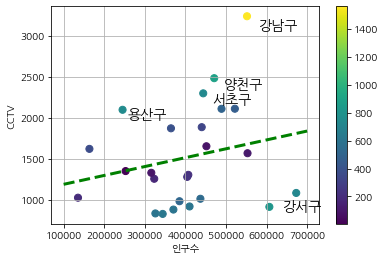

In [102]:
# 시각화
plt.scatter( data_result['인구수'],data_result['소계'], 
            c=data_result['오차'],
            s=50 )
# 인구대비 CCTV의 관계를 1차함수로 표현한 선
plt.plot( x, f1(x), ls='dashed', lw=3, color='g' )
for n in range(5):
    plt.text( df_sort['인구수'][n]*1.05, df_sort['소계'][n]*0.95 ,
            df_sort.index[n], fontSize=14)
    
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.colorbar()
plt.show()

In [ ]:
# 결과 저장
data_result.to_csv( './data/cctv_pop_analysis_result.csv', sep=',', encoding='utf-8' )